In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline
plt.ion()

import sys
sys.path.append('../../')
import logomaker as lm

In [2]:
### Load data

# load all matrices
crp_df = -lm.get_example_matrix('crp_energy_matrix')
ss_df = lm.get_example_matrix('ss_probability_matrix')
ww_df = lm.get_example_matrix('ww_information_matrix')
ars_df = lm.get_example_matrix('ars_weight_matrix')
saliency_df = lm.get_example_matrix('nn_saliency_matrix')

# load ars wt sequence
with lm.open_example_datafile('ars416.txt') as f:
     ars_seq = f.read()

# trim ars data
start=10
stop=100
ars_df = ars_df.iloc[start:stop,:]
ars_df.reset_index(inplace=True, drop=True)
ars_seq = ars_seq[start:stop]

Description of example matrix "crp_energy_matrix":

Description of example matrix "ss_probability_matrix":

Description of example matrix "ww_information_matrix":

Description of example matrix "ars_weight_matrix":

Description of example matrix "nn_saliency_matrix":
# 
# Saliency matrix illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 2019 176(3):535–548.e24.
# 

Description of example matrix "ars416.txt":



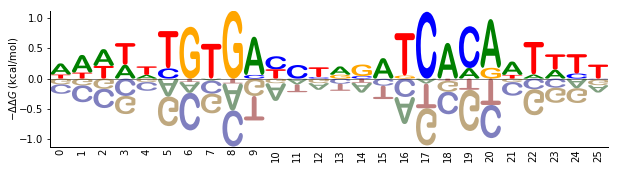

In [3]:
### Style CRP panel
logo = lm.Logo(crp_df, 
               #ax=ax,
               shade_below=.5, 
               fade_below=.5, 
               font_name='Arial Rounded MT Bold')
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True)
logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.ax.xaxis.set_ticks_position('none') 
logo.ax.xaxis.set_tick_params(pad=-1)

Text(0, 0.5, 'probability')

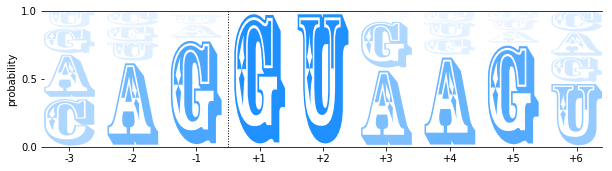

In [4]:
### Style 5'ss panel
logo = lm.Logo(ss_df, 
               #ax=ax,
               width=.8,
               vpad=.05,
               fade_probabilities=True,
               stack_order='small_on_top',
               color_scheme='dodgerblue',
               font_name='Rosewood Std')
logo.ax.set_xticks(range(len(ss_df)))
logo.ax.set_xticklabels('%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6])
logo.style_spines(spines=['left', 'right'], visible=False)
logo.ax.set_yticks([0,.5,1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
logo.ax.set_ylabel('probability')

(-1, 30)

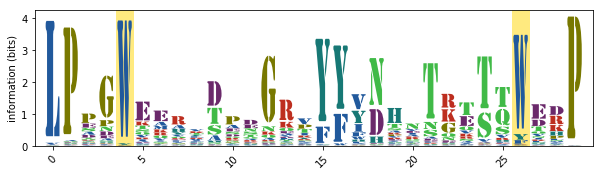

In [5]:
### Style WW panel
logo = lm.Logo(ww_df,
               #ax=ax,
               font_name='Stencil Std',
               color_scheme='NajafabadiEtAl2017',
               vpad=.1,
               width=.8)
logo.ax.set_ylabel('information (bits)')
logo.style_xticks(anchor=0, spacing=5, rotation=45)
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=26, color='gold', alpha=.5)
logo.ax.set_xlim([-1,len(ww_df)])


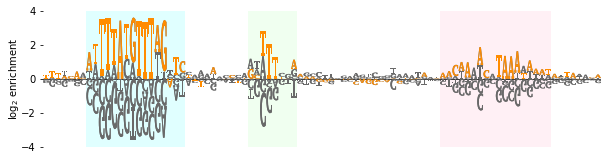

In [6]:
### Style ARS panel
logo = lm.Logo(ars_df, 
               #ax=ax,
               color_scheme='dimgray', 
               font_name='Luxi Mono')
logo.style_glyphs_in_sequence(sequence=ars_seq, color='darkorange')
logo.style_spines(visible=False)
logo.ax.set_ylim([-4,4])
logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)
logo.ax.set_yticks([-4,-2,0,2,4])
logo.ax.set_xticks([])
logo.highlight_position_range(pmin=7, pmax=22, color='lightcyan')
logo.highlight_position_range(pmin=33, pmax=40, color='honeydew')
logo.highlight_position_range(pmin=64, pmax=81, color='lavenderblush')

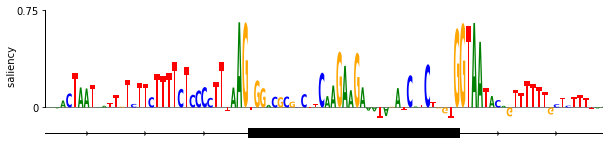

In [7]:
### Style saliency logo
exon_start = 55-.5 
exon_stop = 90+.5 
logo = lm.Logo(saliency_df)
ax = logo.ax
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True, bounds=[0,.75])
ax.set_xlim([20,115])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.3,.75])
ax.set_xticks([])
ax.set_ylabel('        saliency', labelpad=-1)
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(saliency_df),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=10, solid_capstyle='butt')

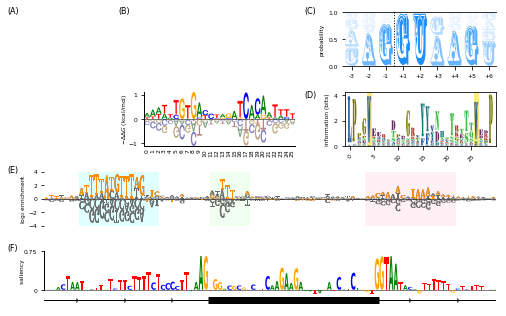

In [8]:
fontsize=6
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

fig = plt.figure(figsize=(7, 4.5))
gs = gridspec.GridSpec(nrows=4, ncols=5)

### CRP logo
ax = fig.add_subplot(gs[1, 1:3])
logo = lm.Logo(crp_df, 
               ax=ax,
               shade_below=.5, 
               fade_below=.5, 
               font_name='Arial Rounded MT Bold')
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True)
logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.ax.xaxis.set_ticks_position('none') 
logo.ax.xaxis.set_tick_params(pad=-1)

### splice site logo
ax = fig.add_subplot(gs[0, 3:5])
logo = lm.Logo(ss_df, 
               ax=ax,
               width=.8,
               vpad=.05,
               fade_probabilities=True,
               stack_order='small_on_top',
               color_scheme='dodgerblue',
               font_name='Rosewood Std')
logo.ax.set_xticks(range(len(ss_df)))
logo.ax.set_xticklabels('%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6])
logo.style_spines(spines=['left', 'right'], visible=False)
logo.ax.set_yticks([0,.5,1])
logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
logo.ax.set_ylabel('probability')

### WW logo
ax = fig.add_subplot(gs[1, 3:5])
logo = lm.Logo(ww_df,
               ax=ax,
               font_name='Stencil Std',
               color_scheme='NajafabadiEtAl2017',
               vpad=.1,
               width=.8)
logo.ax.set_ylabel('information (bits)')
logo.style_xticks(anchor=0, spacing=5, rotation=45)
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=26, color='gold', alpha=.5)
logo.ax.set_xlim([-1,len(ww_df)])

### ARS logo
ax = fig.add_subplot(gs[2, :])
logo = lm.Logo(ars_df, 
               ax=ax,
               color_scheme='dimgray', 
               font_name='Luxi Mono')
logo.style_glyphs_in_sequence(sequence=ars_seq, color='darkorange')
logo.style_spines(visible=False)
logo.ax.set_ylim([-4,4])
logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)
logo.ax.set_yticks([-4,-2,0,2,4])
logo.ax.set_xticks([])
logo.highlight_position_range(pmin=7, pmax=22, color='lightcyan')
logo.highlight_position_range(pmin=33, pmax=40, color='honeydew')
logo.highlight_position_range(pmin=64, pmax=81, color='lavenderblush')

### saliency logo
exon_start = 55-.5 
exon_stop = 90+.5 

ax = fig.add_subplot(gs[3, :])
logo = lm.Logo(saliency_df, ax=ax)
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True, bounds=[0,.75])
ax.set_xlim([20,115])
ax.set_yticks([0,.75])
ax.set_yticklabels(['0','0.75'])
ax.set_ylim([-.3,.75])
ax.set_xticks([])
ax.set_ylabel('        saliency', labelpad=-1)
y = -.2
ax.axhline(y, color='k', linewidth=1)
xs = np.arange(-3,len(saliency_df),10)
ys = y*np.ones(len(xs))
ax.plot(xs,ys,marker='4', linewidth=0, markersize=5, color='k')
ax.plot([exon_start, exon_stop],[y,y], color='k', linewidth=7, solid_capstyle='butt')

# tighten layout
plt.tight_layout(h_pad=1, w_pad=4, pad=2)

# Add panel labels
x1=.00
x2=.22
x3=.59

y1=.97
y2=.71
y3=.48
y4=.24

kwargs = {'fontsize':8, 'horizontalalignment':'left', 'verticalalignment':'top'}

plt.figtext(x1, y1,'(A)', **kwargs)
plt.figtext(x2, y1,'(B)', **kwargs)
plt.figtext(x3, y1,'(C)', **kwargs)
plt.figtext(x3, y2,'(D)', **kwargs)
plt.figtext(x1, y3,'(E)', **kwargs)
plt.figtext(x1, y4,'(F)', **kwargs)

# save a pdf
fig.savefig('figure_logos.pdf', transparent=True)

In [9]:
### Print out CRP emat for Fig 1A
print('       A      C      G      T')
for i, row in crp_df.iterrows():
    if i <= 9 or i==25:
        line = '%2d'%i + ''.join(['  %+1.2f'%x for x in row])
        print(line)
    if i == 10:
        print('')

       A      C      G      T
 0  +0.18  -0.16  -0.09  +0.07
 1  +0.29  -0.28  -0.11  +0.10
 2  +0.28  -0.32  -0.17  +0.21
 3  +0.23  -0.29  -0.30  +0.36
 4  +0.06  -0.14  -0.06  +0.14
 5  -0.29  +0.17  -0.49  +0.61
 6  -0.18  -0.62  +0.85  -0.06
 7  -0.03  -0.21  -0.32  +0.57
 8  -0.44  -0.59  +1.12  -0.08
 9  +0.63  +0.06  -0.29  -0.40

25  -0.12  -0.02  -0.09  +0.23
